In [43]:
import numpy as np
import pandas as pd
import warnings

In [44]:
warnings.filterwarnings('ignore')

In [45]:
col_name=["user_id","item_id","rating","timestamp"]
df=pd.read_csv('u.data',sep='\t',names=col_name)


In [46]:
df.head()
# df.iloc[5]
# df.shape

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [47]:
(df.get("user_id").nunique())

943

In [48]:
(df.get("item_id").nunique())

1682

In [49]:
df2=pd.read_csv('u.item',sep='|',header=None)

In [50]:

df2=df2.get([0,1])
df2.columns=["item_id","movie"]
df2

,item_id,movie
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
...,...,...
1677,1678,Mat' i syn (1997)
1678,1679,B. Monkey (1998)
1679,1680,Sliding Doors (1998)
1680,1681,You So Crazy (1994)


In [51]:
df=pd.merge(df,df2,on="item_id")

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("white")

df

,user_id,item_id,rating,timestamp,movie
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)
...,...,...,...,...,...
99995,840,1674,4,891211682,Mamma Roma (1962)
99996,655,1640,3,888474646,"Eighth Day, The (1996)"
99997,655,1637,3,888984255,Girls Town (1996)
99998,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."


In [53]:
c=df.groupby("movie").count()['rating'].sort_values(ascending=False)
# c=pd.DataFrame(c,columns=['movie','count'])
c.head()
# c.column
# print(c.head())

movie
Star Wars (1977)             583
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [54]:
ratings=df.groupby("movie").mean()['rating'].sort_values(ascending=False)
# .mean()['rating'].sort_values(ascending=False)
# df.head()
ratings=pd.merge(c,ratings,on="movie")
# ratings.columns=['movie','count','rating']
ratings.columns=['count','rating']
ratings.sort_values("rating",ascending=False)

,count,rating
movie,,
Entertaining Angels: The Dorothy Day Story (1996),1,5.0
"Saint of Fort Washington, The (1993)",2,5.0
Marlene Dietrich: Shadow and Light (1996),1,5.0
"Great Day in Harlem, A (1994)",1,5.0
They Made Me a Criminal (1939),1,5.0
...,...,...
"Invitation, The (Zaproszenie) (1986)",1,1.0
JLG/JLG - autoportrait de d�cembre (1994),1,1.0
Tigrero: A Film That Was Never Made (1994),1,1.0


(array([520., 171., 122., 103.,  71.,  81.,  57.,  58.,  45.,  38.,  39.,
         25.,  26.,  22.,  25.,  28.,  14.,  16.,  14.,  15.,  24.,  15.,
          9.,   9.,   8.,   9.,  12.,   7.,   6.,   7.,   7.,   6.,   3.,
          5.,   3.,  11.,   2.,   3.,   2.,   2.,   1.,   3.,   0.,   1.,
          1.,   2.,   2.,   2.,   0.,   1.,   1.,   2.,   0.,   0.,   1.,
          0.,   0.,   2.,   1.,   0.,   2.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   1.]),
 array([  1.        ,   9.31428571,  17.62857143,  25.94285714,
         34.25714286,  42.57142857,  50.88571429,  59.2       ,
         67.51428571,  75.82857143,  84.14285714,  92.45714286,
        100.77142857, 109.08571429, 117.4       , 125.71428571,
        134.02857143, 142.34285714, 150.65714286, 158.97142857,
        167.28571429, 175.6       , 183.91428571, 192.22857143,
        200.54285714, 208.85714286, 217.17142857, 225.48571429,
        233.8       , 242.11428571, 250.42857143, 258.74285714,
        26

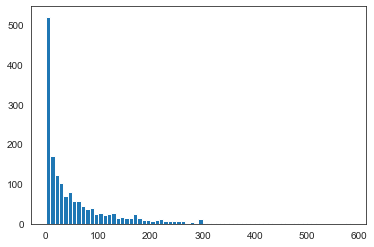

In [55]:
plt.hist(ratings['count'],bins=70)

In [56]:
piv=df.pivot_table(columns='movie',values='rating',index='user_id')

In [57]:
sw=ratings.sort_values('count',ascending=False)
star=piv['Star Wars (1977)']
# print(star,piv['Hollow Reed (1996)'].sort_values(ascending=False))

In [58]:
sim_to_sw=piv.corrwith(star)

In [65]:
sim_to_sw=pd.DataFrame(sim_to_sw,columns=['correlation'])
sim_to_sw.dropna(inplace=True)
sim_to_sw

,correlation
movie,
Hollow Reed (1996),1.0
Stripes (1981),1.0
Star Wars (1977),1.0
Man of the Year (1995),1.0
Commandments (1997),1.0
...,...
I Like It Like That (1994),-1.0
Crossfire (1947),-1.0
Two Deaths (1995),-1.0


In [67]:
sim_to_sw=sim_to_sw.sort_values("correlation",ascending=False)
sim_to_sw=sim_to_sw.join(ratings['count'])
# sim_to_sw=sim_to_sw['correlation']
sim_to_sw

,correlation,count
movie,,
Hollow Reed (1996),1.0,6
Man of the Year (1995),1.0,9
Commandments (1997),1.0,3
Cosi (1996),1.0,4
No Escape (1994),1.0,5
...,...,...
I Like It Like That (1994),-1.0,3
Crossfire (1947),-1.0,4
Two Deaths (1995),-1.0,4


In [75]:
sim_to_sw[sim_to_sw['count']>100].sort_values('count',ascending=False)

,correlation,count
movie,,
Star Wars (1977),1.000000,583
Contact (1997),0.134962,509
Fargo (1996),0.044415,508
Return of the Jedi (1983),0.672556,507
Liar Liar (1997),0.150292,485
...,...,...
Miracle on 34th Street (1994),0.310921,101
"Sex, Lies, and Videotape (1989)",0.141089,101
Down Periscope (1996),0.228107,101


In [76]:
def predict(name):
    star=piv[name]
    sim_to_sw=piv.corrwith(star)
    sim_to_sw=pd.DataFrame(sim_to_sw,columns=['correlation'])
    sim_to_sw.dropna(inplace=True)
    sim_to_sw=sim_to_sw.sort_values("correlation",ascending=False)
    sim_to_sw=sim_to_sw.join(ratings['count'])
    sim_to_sw=sim_to_sw[sim_to_sw['count']>100].sort_values('count',ascending=False)
    print(sim_to_sw.head())

In [79]:
predict("Titanic (1997)")

                           correlation  count
movie                                        
Star Wars (1977)              0.081928    583
Contact (1997)                0.105680    509
Fargo (1996)                  0.135138    508
Return of the Jedi (1983)     0.221363    507
Liar Liar (1997)              0.244899    485
